# Analysis Part 2

Now that we cleaned the data, we can get started analyzing it... Import libraries and data as required.  

In [2]:
# Library imports needed for analysis conducted and visual graphs.

from string import ascii_letters
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Dataframes created from CSV files 

df1= pd.read_csv('data_clean.csv')
df2= pd.read_csv('votes_clean.csv')

In [4]:
# Merge dataframes into one.

elect_data = pd.merge(df1, df2, on='Fips', how='left')
elect_data.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Democrats08_Voteshare,Republicans08_Voteshare,Democrats12_Voteshare,Republicans12_Voteshare,Democrats16_Voteshare,Republicans16_Voteshare
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,...,3860.0,3887.0,3967.0,2364.0,0.402292,0.597708,0.403560,0.596440,0.373401,0.626599
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,...,3972.0,4263.0,4917.0,1587.0,0.350556,0.649444,0.329928,0.670072,0.244004,0.755996
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,...,3916.0,4136.0,4353.0,1544.0,0.330713,0.669287,0.308477,0.691523,0.261828,0.738172
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,...,8181.0,9411.0,8153.0,12652.0,0.617209,0.382791,0.576138,0.423862,0.608123,0.391877
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,...,5543.0,5214.0,5021.0,1836.0,0.318874,0.681126,0.318966,0.681034,0.267756,0.732244


In [5]:
# View correlations between variables.
elect_data_corr = elect_data.corr()

### Visualize Correlation
To better understand and read the data, we can use seaborn to create a handy visual tool.

In [6]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(elect_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [7]:
# Generate a custom diverging colormap
corr_visual = sns.diverging_palette(220, 10, as_cmap=True)

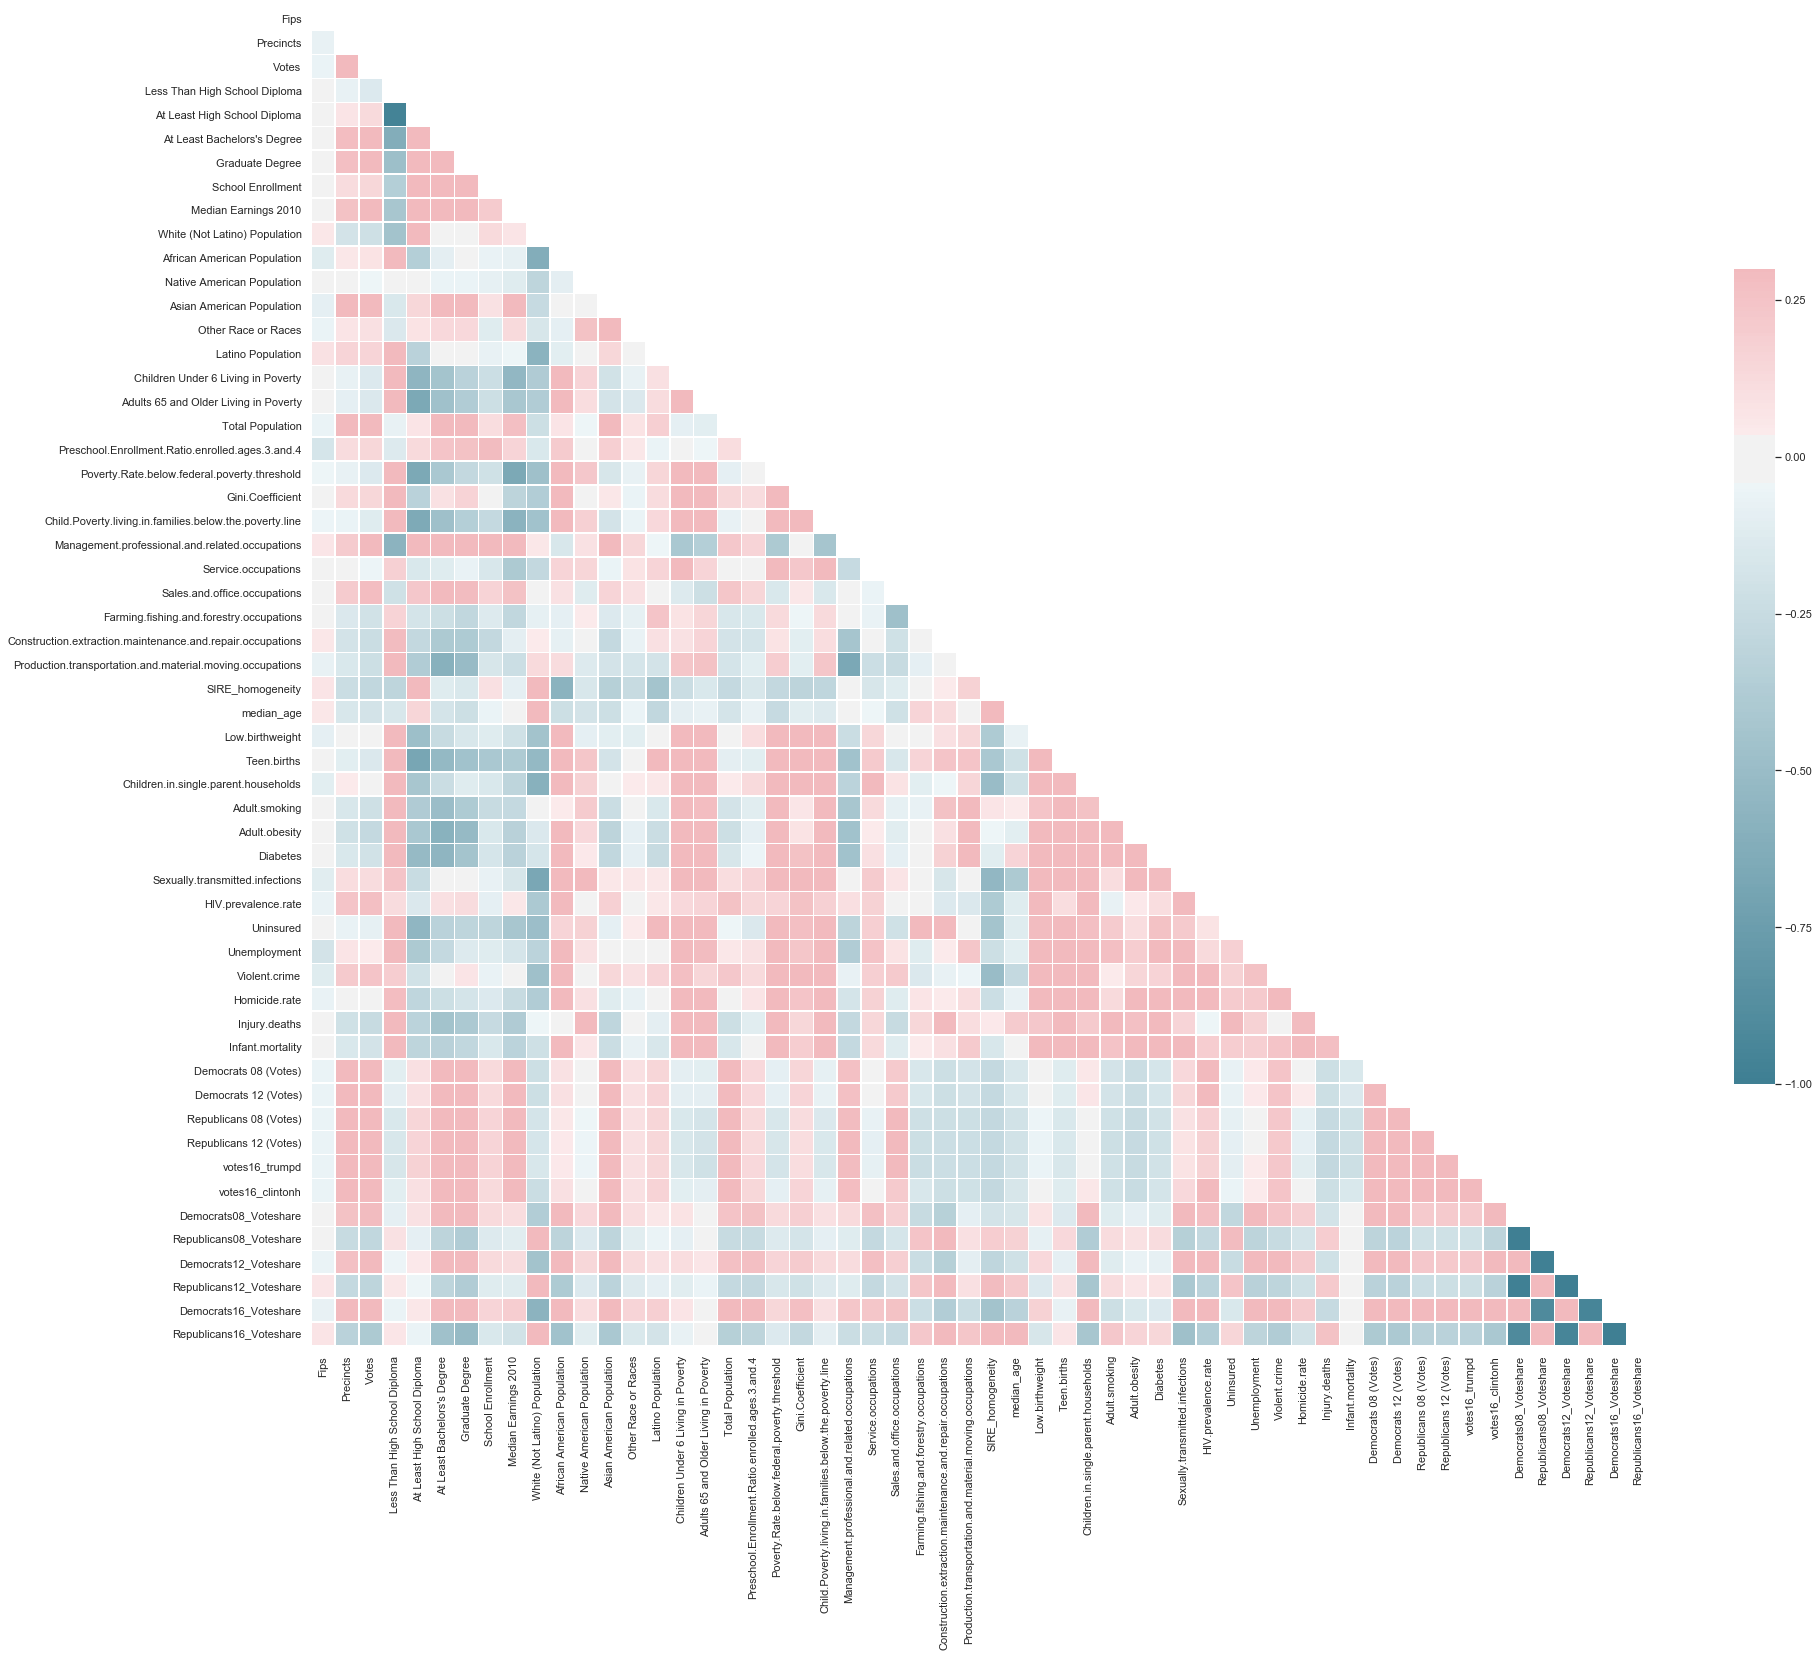

In [8]:

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(elect_data_corr, mask=mask, cmap=corr_visual, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Which data columns are correlated with the Republican vote share? Which columns are not? Does this pattern appear in all 3 elections we have data for?

In [9]:
# Create new dataframes for each election year to find correlations with Republican vote shares and variables.

Rep_08 = elect_data_corr['Republicans08_Voteshare']
Rep_12 = elect_data_corr['Republicans12_Voteshare']
Rep_16 = elect_data_corr['Republicans16_Voteshare']

In [10]:
# Sort values to organize visually

Rep_08_sort = Rep_08.sort_values()
Rep_12_sort = Rep_12.sort_values()
Rep_16_sort = Rep_16.sort_values()

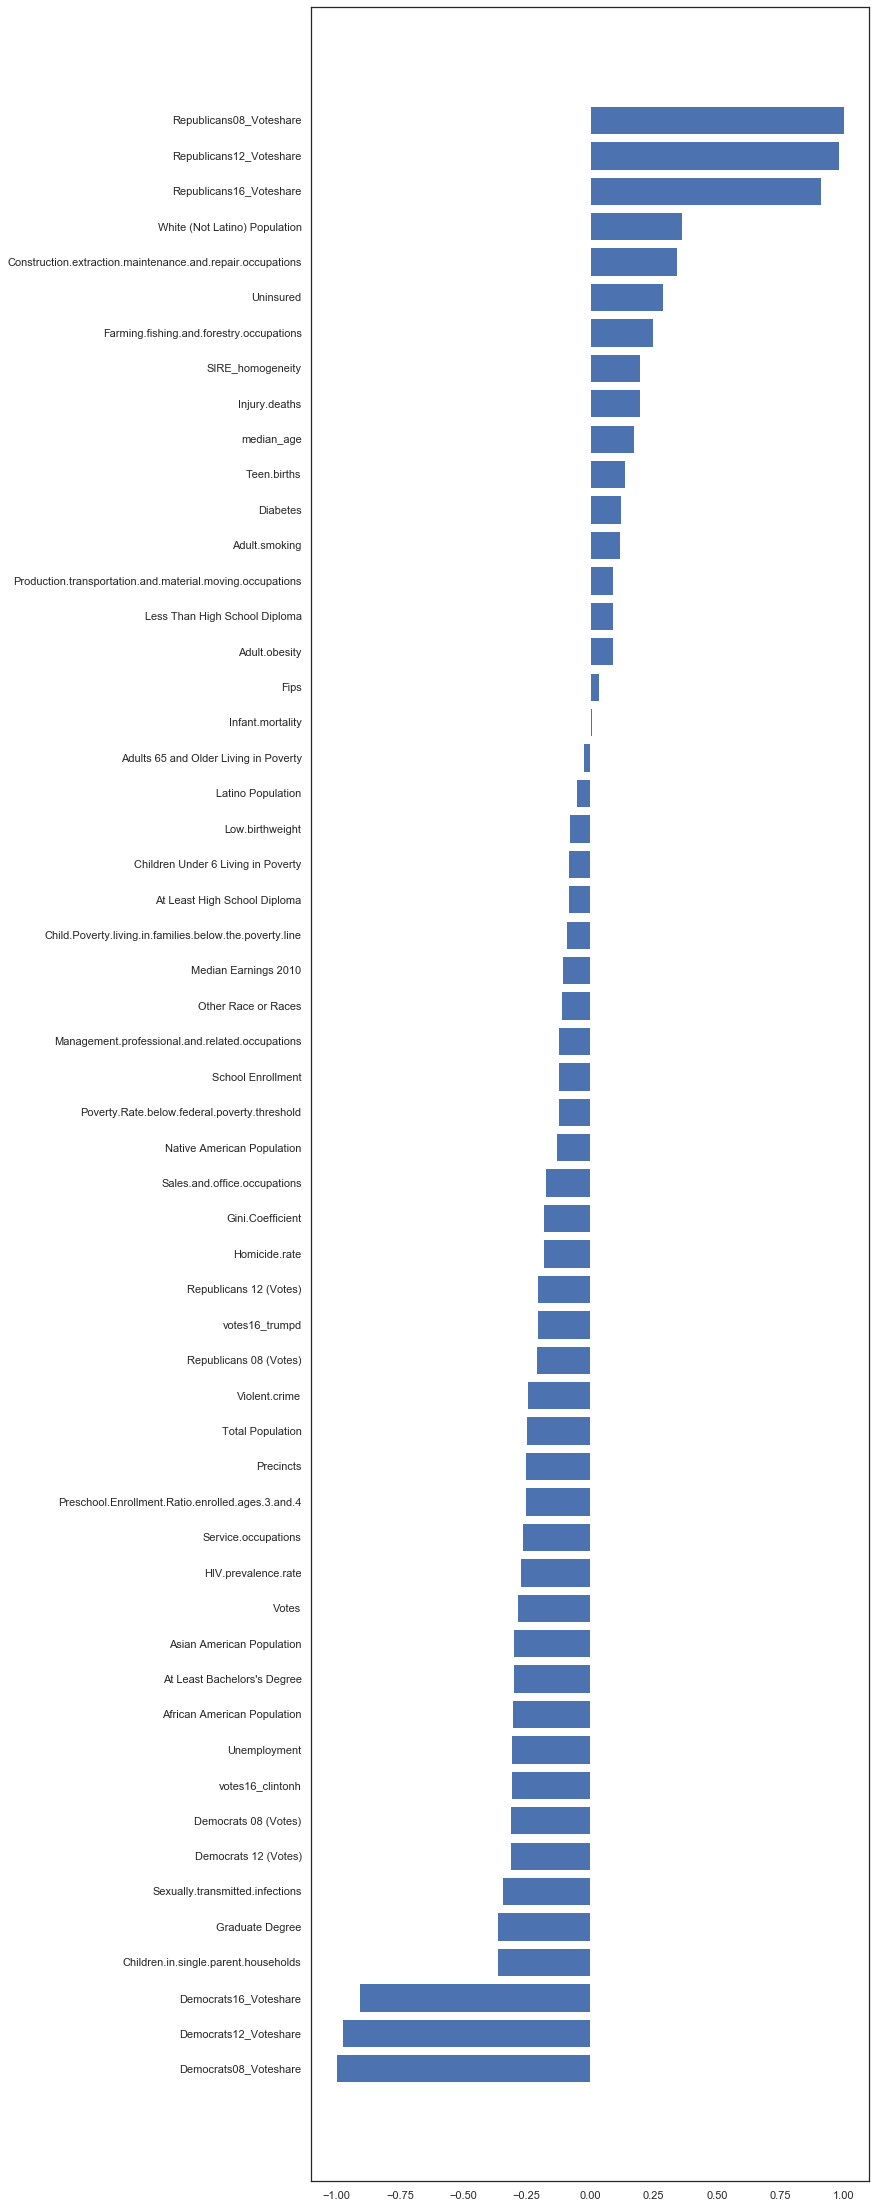

In [11]:
# Republican 2008 election data correlations 
plt.figure(figsize = (10,40))
plt.barh(Rep_08_sort.index, Rep_08_sort.values)
plt.show()

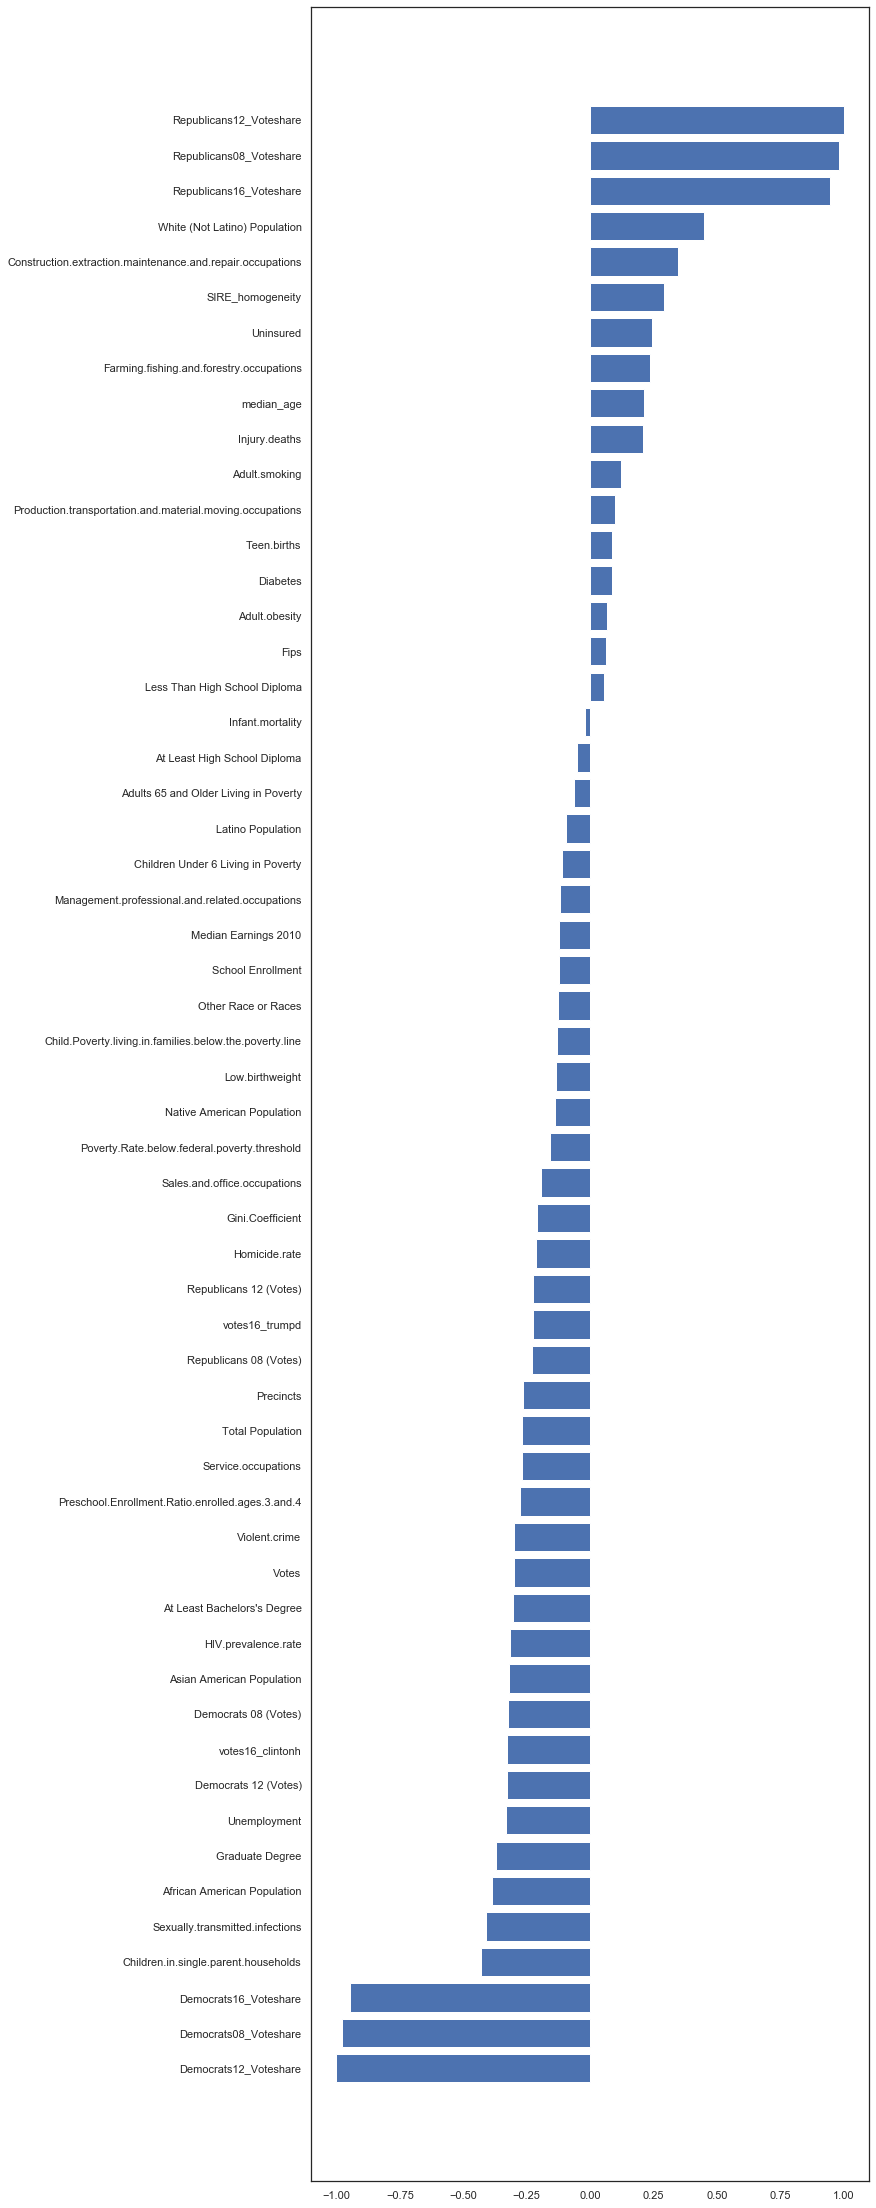

In [12]:
# Republican 12 election data correlations  
plt.figure(figsize = (10,40))
plt.barh(Rep_12_sort.index, Rep_12_sort.values)
plt.show()

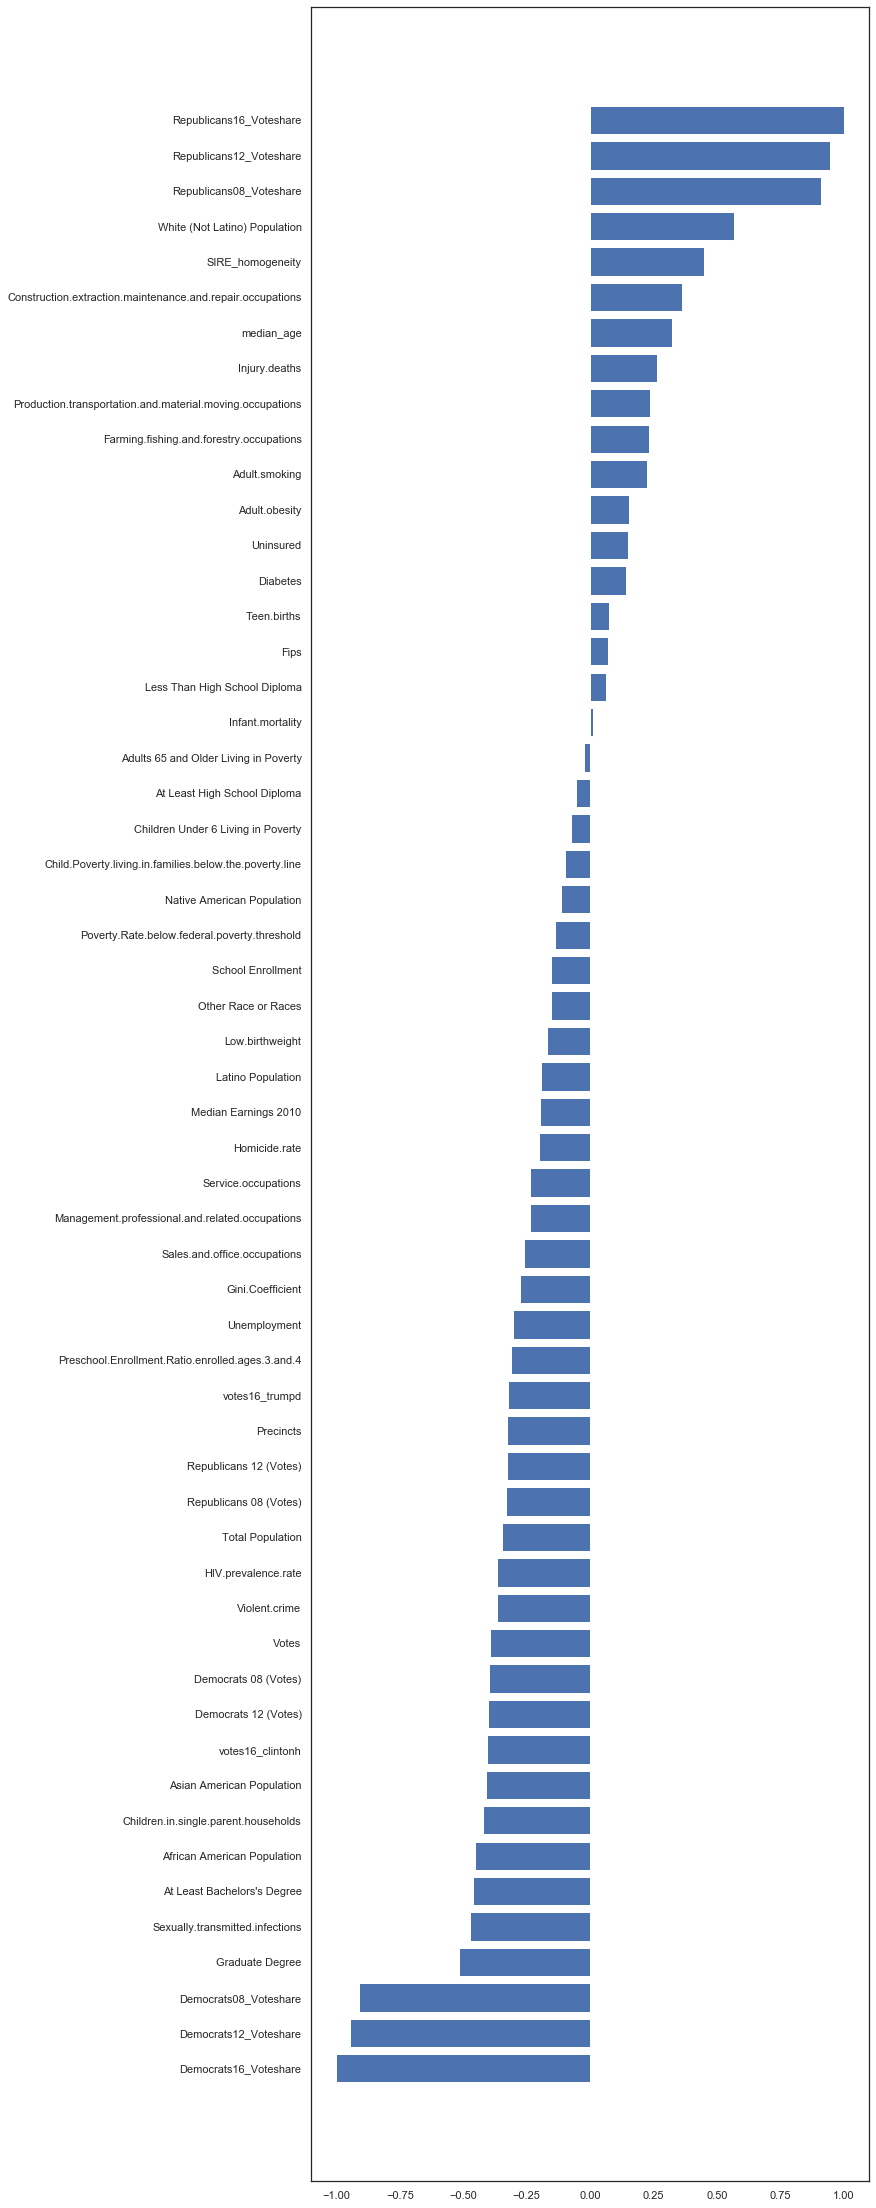

In [13]:
# Republican 16 election data correlations 
plt.figure(figsize = (10,40))
plt.barh(Rep_16_sort.index, Rep_16_sort.values)
plt.show()

Looking at the graphs above, we can see that there are many variable correlations with Republican Vote share. These graphs help paint a picture of who is voting for the Republican candidate, and who are voting for the Democratic candidate. We safely say that there are many differences between voters for each party. People who support the Democrats are usually foreign immigrants who moved to the US, either generations ago or recently, and are more educated compared to Republican voters. Republican voters have Blue Collar jobs, and work in labor. While democrats tend to work in graduate degree jobs.

There are patterns and trends that occur for each election, notably speaking, racial demographics are very strongly correlated with voteshares. Different racial groups are alot stronger for each election, this is usually related to the candidate themselves and upsetting a large portion of that demographic. 

# How are the racial demographics correlated with Republican vote share? Is there any race which is consistently correlated with the Republican vote share? Are these correlations statistically significant?

### Correlations Conlucion
Republican vote shares are `strongly correlated` with White, non-lation people for every election, Blue-collar jobs, along with Agricultural  jobs. Teen pregnancy, smoking, uninsured, and diabetes. The Middle aged population are also correlated with Republican votes.



`Negativley correlated` variables with the Republican votes, which translate too the majorirt of Democratic voters being non-White, educated, and middle class citizens. Notable variables with strong correlations are the African American population, single parent house holds, unemployment, and Graduate degress.

Each election has different variables that correlate stronger or weaker to vote shares for each party. This is due to different groups in the population reacting differently to each presendital candidiate. At this point we have good classification on the correlations. Let's see if there is any statisitcal significance to racial background and vote share by conducting a `stats.pearsonr(x, y)` or p-value test. 

### P-value Tests 
Below are the p-value scores for multiple races and vote share per election for the republican party.

In [14]:
#Republican 08 election racial correlations conducted by Pearsonr test

x1 = elect_data['White (Not Latino) Population']
y1 = elect_data['Republicans08_Voteshare']
print('Rep08 and White (Not Latino) Population')
print(stats.pearsonr(x1, y1))

x2 = elect_data['African American Population']
y2 = elect_data['Republicans08_Voteshare']
print('Rep08 and African American Population')
print(stats.pearsonr(x2, y2))

x3 = elect_data['Native American Population']
y3 = elect_data['Republicans08_Voteshare']
print('Rep08 and Native American Population')
print(stats.pearsonr(x3, y3))

x4 = elect_data['Asian American Population']
y4 = elect_data['Republicans08_Voteshare']
print('Rep08 and Asian American Population')
print(stats.pearsonr(x4, y4))

x5 = elect_data['Other Race or Races']
y5 = elect_data['Republicans08_Voteshare']
print('Rep08 and Other Race or Races')
print(stats.pearsonr(x5, y5))

x6 = elect_data['Latino Population']
y6 = elect_data['Republicans08_Voteshare']
print('Rep08 and Latino Population')
print(stats.pearsonr(x6, y6))

Rep08 and White (Not Latino) Population
(0.362434837582106, 4.010977847519455e-98)
Rep08 and African American Population
(-0.3065732936983868, 2.443434210837339e-69)
Rep08 and Native American Population
(-0.13536080335639022, 2.5701471817037828e-14)
Rep08 and Asian American Population
(-0.3041690416826692, 3.1276296274783245e-68)
Rep08 and Other Race or Races
(-0.11420462417432722, 1.371555039136935e-10)
Rep08 and Latino Population
(-0.05712682764196193, 0.0013600726362253206)


The p-values for race and Republican vote shares for 2008 are very small, meaning they don't have much significance. Except for Latino populations. Meaning that, if we were to handpick a random sample of the latino population. They would of voted for the Democrats, as they are negativley correlated with Republican 08 vote shares. However, the correlation between race and party stands strong for each election. 

In [15]:
#Republican 12 election racial correlations 
x1 = elect_data['White (Not Latino) Population']
y1 = elect_data['Republicans12_Voteshare']
print('Rep12 and White (Not Latino) Population')
print(stats.pearsonr(x1, y1))

x2 = elect_data['African American Population']
y2 = elect_data['Republicans12_Voteshare']
print('Rep12 and African American Population')
print(stats.pearsonr(x2, y2))

x3 = elect_data['Native American Population']
y3 = elect_data['Republicans12_Voteshare']
print('Rep12 and Native American Population')
print(stats.pearsonr(x3, y3))

x4 = elect_data['Asian American Population']
y4 = elect_data['Republicans12_Voteshare']
print('Rep12 and Asian American Population')
print(stats.pearsonr(x4, y4))

x5 = elect_data['Other Race or Races']
y5 = elect_data['Republicans12_Voteshare']
print('Rep12 and Other Race or Races')
print(stats.pearsonr(x5, y5))

x6 = elect_data['Latino Population']
y6 = elect_data['Republicans12_Voteshare']
print('Rep12 and Latino Population')
print(stats.pearsonr(x6, y6))



Rep12 and White (Not Latino) Population
(0.4493362206313252, 5.980633927410863e-156)
Rep12 and African American Population
(-0.3869820765990624, 9.646709406486162e-113)
Rep12 and Native American Population
(-0.1376042496171097, 9.499615747980412e-15)
Rep12 and Asian American Population
(-0.3182042758765935, 7.635539350258319e-75)
Rep12 and Other Race or Races
(-0.12728073550284805, 8.085485781195757e-13)
Rep12 and Latino Population
(-0.09365465708001645, 1.453842775690736e-07)


The p-values are too little to be of any signifance. But the correlations still stand true. 

In [16]:
#Republican 16 election racial correlations 
x1 = elect_data['White (Not Latino) Population']
y1 = elect_data['Republicans16_Voteshare']
print('Rep16 and White (Not Latino) Population')
print(stats.pearsonr(x1, y1))

x2 = elect_data['African American Population']
y2 = elect_data['Republicans16_Voteshare']
print('Rep16 and African American Population')
print(stats.pearsonr(x2, y2))

x3 = elect_data['Native American Population']
y3 = elect_data['Republicans16_Voteshare']
print('Rep16 and Native American Population')
print(stats.pearsonr(x3, y3))

x4 = elect_data['Asian American Population']
y4 = elect_data['Republicans16_Voteshare']
print('Rep16 and Asian American Population')
print(stats.pearsonr(x4, y4))

x5 = elect_data['Other Race or Races']
y5 = elect_data['Republicans16_Voteshare']
print('Rep16 and Other Race or Races')
print(stats.pearsonr(x5, y5))

x6 = elect_data['Latino Population']
y6 = elect_data['Republicans16_Voteshare']
print('Rep16 and Latino Population')
print(stats.pearsonr(x6, y6))

Rep16 and White (Not Latino) Population
(0.5687499948506415, 1.0647161406325531e-268)
Rep16 and African American Population
(-0.45288757986849093, 1.0747550590205258e-158)
Rep16 and Native American Population
(-0.11575052087330824, 7.692570555018936e-11)
Rep16 and Asian American Population
(-0.4117521982159324, 8.110230701084886e-129)
Rep16 and Other Race or Races
(-0.15459566471321634, 2.9531675349649853e-18)
Rep16 and Latino Population
(-0.19227451624963968, 1.5456497197536101e-27)


The p-values are too little to be of any signifance. But the correlations still stand true. 

It's hard to replicate these values as elections are a case-by-case basis, however this does not mean that republican and democrat voters don't fit a certain background, because they do. But, it would be almost impossible to replicate similar results as elections contain hundreds of variables that voters take into account, conciously and subconciously. 

# Examine California and Texas as individuals, do nationwide voting paterns and demographic trends follow suite at their respective state level?
Creating 2 new dataframes: one containing only counties in California, the other containing only counties in Texas. Do the nationwide patterns that you found in the previous question still hold in these particular states? Which races remain positively (or negatively) correlated with a political party in each state? Are there races in California or Texas that have different correlations than the national trends?

In [17]:
# Create a dataframe to filter the data that only selects rows containing TX or California as state.
texas = elect_data[elect_data['ST']=='TX']
cali = elect_data[elect_data['ST']=='CA']

### Republican Texas Data

In [18]:
# Find the correlation with vote share for Republican party in Texas

texas_cor = texas.corr()

texas08 = texas_cor['Republicans08_Voteshare']
texas08_sort = texas08.sort_values()


texas12 = texas_cor['Republicans12_Voteshare']
texas12_sort = texas12.sort_values()


texas16 = texas_cor['Republicans16_Voteshare']
texas16_sort = texas16.sort_values()

states=(texas08, texas12, texas16)

# Print out in a list style format with sorted values.

print('''
    ELECTION 2008 Republican Vote Correlation in TX

''')
print(texas08_sort)
print('''
    ELECTION 2012 Republican Vote Correlation in TX

''')
print(texas12_sort)
print('''
    ELECTION 2016 Republican Vote Correlation in TX

''')
print(texas16_sort)


    ELECTION 2008 Republican Vote Correlation in TX


Democrats08_Voteshare                                        -1.000000
Democrats12_Voteshare                                        -0.989906
Democrats16_Voteshare                                        -0.968078
Latino Population                                            -0.671437
Poverty.Rate.below.federal.poverty.threshold                 -0.586646
Adults 65 and Older Living in Poverty                        -0.567865
Less Than High School Diploma                                -0.507499
Service.occupations                                          -0.484286
Unemployment                                                 -0.466870
Child.Poverty.living.in.families.below.the.poverty.line      -0.463042
Sexually.transmitted.infections                              -0.399705
Children.in.single.parent.households                         -0.378561
Children Under 6 Living in Poverty                           -0.362910
Violent.crime         

### Democrat Texas Data

In [19]:
# Find the correlation with vote share for Democrat party in California

texas_cor = texas.corr()

texas08 = texas_cor['Democrats08_Voteshare']
texas08_sort = texas08.sort_values()


texas12 = texas_cor['Democrats12_Voteshare']
texas12_sort = texas12.sort_values()


texas16 = texas_cor['Democrats16_Voteshare']
texas16_sort = texas16.sort_values()

print('''
    ELECTION 2008 Democrat Vote Correlation in TX

''')
print(texas08_sort)
print('''
    ELECTION 2012 Democrat Vote Correlation in TX

''')
print(texas12_sort)
print('''
    ELECTION 2016 Democrat Vote Correlation in TX

''')
print(texas16_sort)





    ELECTION 2008 Democrat Vote Correlation in TX


Republicans08_Voteshare                                      -1.000000
Republicans12_Voteshare                                      -0.989906
Republicans16_Voteshare                                      -0.968078
White (Not Latino) Population                                -0.770628
At Least High School Diploma                                 -0.432325
median_age                                                   -0.414362
Injury.deaths                                                -0.388476
Median Earnings 2010                                         -0.370887
Diabetes                                                     -0.314961
Infant.mortality                                             -0.279863
Other Race or Races                                          -0.220248
Management.professional.and.related.occupations              -0.216876
Production.transportation.and.material.moving.occupations    -0.206304
Adult.smoking           

## Democrat and Republican Texas Election Data Conclusions 

Noteable variable correlations that are `negativley correlated` with Republican vote shares in TX are the Latino population, lower class, and elderly citizens.

`Positivley correlated` variables are White Americans and middle class texans  


### Republican California Data

In [20]:
# Find the correlation with vote share for Republican party in Texas
cali_cor = cali.corr()

cali08 = cali_cor['Republicans08_Voteshare']
cali08_sort = cali08.sort_values()


cali12 = cali_cor['Republicans12_Voteshare']
cali12_sort = cali12.sort_values()


cali16 = cali_cor['Republicans16_Voteshare']
cali16_sort = cali16.sort_values()

print('''
    ELECTION 2008 Republican Vote Correlation in CA

''')
print(cali08_sort)
print('''
    ELECTION 2012 Republican Vote Correlation in CA

''')
print(cali12_sort)
print('''
    ELECTION 2016 Republican Vote Correlation in CA

''')
print(cali16_sort)


    ELECTION 2008 Republican Vote Correlation in CA


Democrats08_Voteshare                                        -1.000000
Democrats12_Voteshare                                        -0.995656
Democrats16_Voteshare                                        -0.977788
Graduate Degree                                              -0.742078
At Least Bachelors's Degree                                  -0.723636
Management.professional.and.related.occupations              -0.578632
Gini.Coefficient                                             -0.568841
Asian American Population                                    -0.560688
Median Earnings 2010                                         -0.508115
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4             -0.494350
HIV.prevalence.rate                                          -0.485153
School Enrollment                                            -0.440628
votes16_clintonh                                             -0.344554
Democrats 08 (Votes)  

### Democraft California Data

In [21]:
# Find the correlation with vote share for Democrat party in California

cali_cor = cali.corr()

cali08 = cali_cor['Democrats08_Voteshare']
cali08_sort = cali08.sort_values()


cali12 = cali_cor['Democrats12_Voteshare']
cali12_sort = cali16.sort_values()


cali16 = cali_cor['Democrats16_Voteshare']
cali16_sort = cali16.sort_values()

print('''
    ELECTION 2008 Democrat Vote Correlation in CA

''')
print(cali08_sort)
print('''
    ELECTION 2012 Democrat Vote Correlation in CA

''')
print(cali12_sort)
print('''
    ELECTION 2016 Democrat Vote Correlation in CA

''')
print(cali16_sort)


    ELECTION 2008 Democrat Vote Correlation in CA


Republicans08_Voteshare                                      -1.000000
Republicans12_Voteshare                                      -0.995656
Republicans16_Voteshare                                      -0.977788
Infant.mortality                                             -0.583151
Adult.smoking                                                -0.529253
Adult.obesity                                                -0.463725
Diabetes                                                     -0.445665
Construction.extraction.maintenance.and.repair.occupations   -0.441250
Unemployment                                                 -0.431407
Injury.deaths                                                -0.426153
SIRE_homogeneity                                             -0.420192
Service.occupations                                          -0.419918
Teen.births                                                  -0.371559
Child.Poverty.living.in.

## Democrat and Republican California Election Data Conclusions 

`negativley correlated` with Republican votes are Asian Americans, Graduate degrees, and middle class. For Democrats, negative correalted variables are blue collar jobs, and low class citizens in California. 

`Positivley correlated` variables for Republicans are smokers and obese people.

#### State vs Country Race correlations
The main reason why we are seeing a big difference in correlation between races is at a state level is because the both represent a large majority of Democrats and Republicans. Over recent histroy, Texas is a Red state and California is a Blue one. Asian Americans are much more negativley correlated with Republican votes in California compared to the rest of the US. In 2012, African Americans were negativley correlated for Democratic votes in California, which is opposite for the rest of the US. 






# At a county level visualize the percentage share of the Republican votes in each election. What visualization method is most appropriate for this task? (We are asking for three plots, one for each election.) What are some of the similarities and differences between the 3 elections?


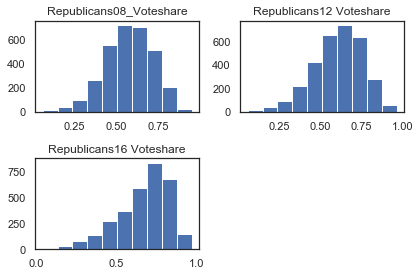

In [22]:
# Set up the grid
plt.subplots(2,1)

# First plot
plt.subplot(2,2,1)
plt.title('Republicans08_Voteshare')
plt.hist(elect_data['Republicans08_Voteshare'])
# Second
plt.subplot(2,2,2)
plt.title('Republicans12 Voteshare')
plt.hist(elect_data['Republicans12_Voteshare'])
# Third
plt.subplot(2,2,3)
plt.title('Republicans16 Voteshare')
plt.hist(elect_data['Republicans16_Voteshare'])
# Tight_layought stops plots from text overlapping
plt.tight_layout()
plt.show()

Some similaties are during the 08' and 12' elections, the Republican vote distribution is about the same, with a similar mode and mean. differences are in 16' election, Americans saw an increase in majority Republican vote share, skewing the data to the left. We can condlude that in 2016, more Americans wanted a Republican candidate. 

# At a state level visualize the percentage share of the Republican votes in each election. What visualization method is most appropriate for this task? (We are asking for three plots, one for each election.) What are some of the similarities and differences between the 3 elections?



In [23]:
# Create a new df that consists of only vote count columns. Grouped by State with the values summed up to accuraetly display data per State
df_state = elect_data.groupby('State').agg(sum).loc[:, "Democrats 08 (Votes)":"votes16_clintonh"]

In [24]:
# Create new df's with columns that count total vote for each election, which we will use to divide by. 
elec2008 = df_state["Democrats 08 (Votes)"] + df_state["Republicans 08 (Votes)"]
elec2012 = df_state["Democrats 12 (Votes)"] + df_state["Republicans 12 (Votes)"]
elec2016 = df_state["votes16_trumpd"] + df_state["votes16_clintonh"]

In [25]:
# Find percent of votes per state for each election.
df_state = df_state.iloc[:,[2,3,4]]

In [26]:
# Divide by the total vote count to find State share for votes.
df_state.iloc[:,0]/=elec2008
df_state.iloc[:,1]/=elec2012
df_state.iloc[:,2]/=elec2016

In [27]:
# See if aggregations worked
df_state

,Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd
State,,,
Alabama,0.608909,0.612162,0.645392
Alaska,0.462702,0.480121,0.494427
Arizona,0.543139,0.546134,0.521688
Arkansas,0.598812,0.618702,0.638473
California,0.377216,0.381272,0.347222
Colorado,0.454492,0.472520,0.484093
Connecticut,0.386816,0.412270,0.430390
Delaware,0.373619,0.405530,0.440005
District of Columbia,0.065992,0.074124,0.042509


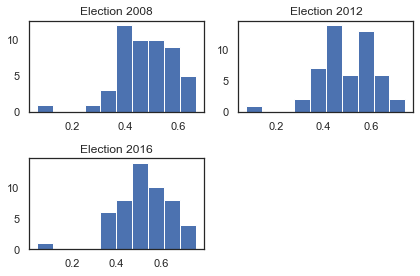

In [28]:
# Set up the grid
plt.subplots(2,1)

# First plot
plt.subplot(2,2,1)
plt.title('Election 2008')
plt.hist(df_state['Republicans 08 (Votes)'])
# Second
plt.subplot(2,2,2)
plt.title('Election 2012')
plt.hist(df_state['Republicans 12 (Votes)'])
# Third
plt.subplot(2,2,3)
plt.title('Election 2016')
plt.hist(df_state['votes16_trumpd'])
# Tight_layought stops plots from text overlapping
plt.tight_layout()
plt.show()

## Comparing State Vs Country Voteshare
The distribution is much more uneven when comparing by State level. My answer has changed from the last question, but we can look deeper with better visuals

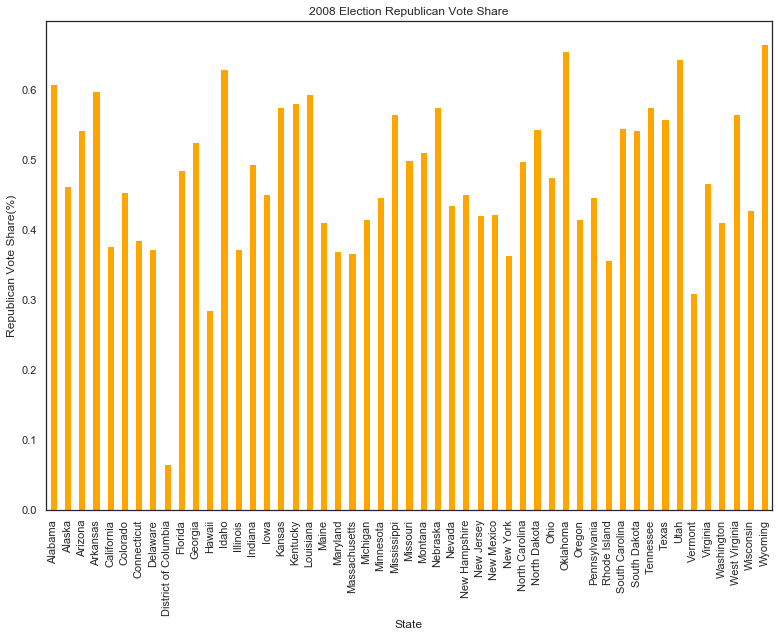

In [29]:
# Bar graph representing 2008 Republican voteshare by state in percetange 

plt.figure(figsize=(13,9))
df_state['Republicans 08 (Votes)'].plot(kind='bar', color='orange')
plt.ylabel('Republican Vote Share(%)')
plt.xlabel('State')
plt.title('2008 Election Republican Vote Share')
plt.show()

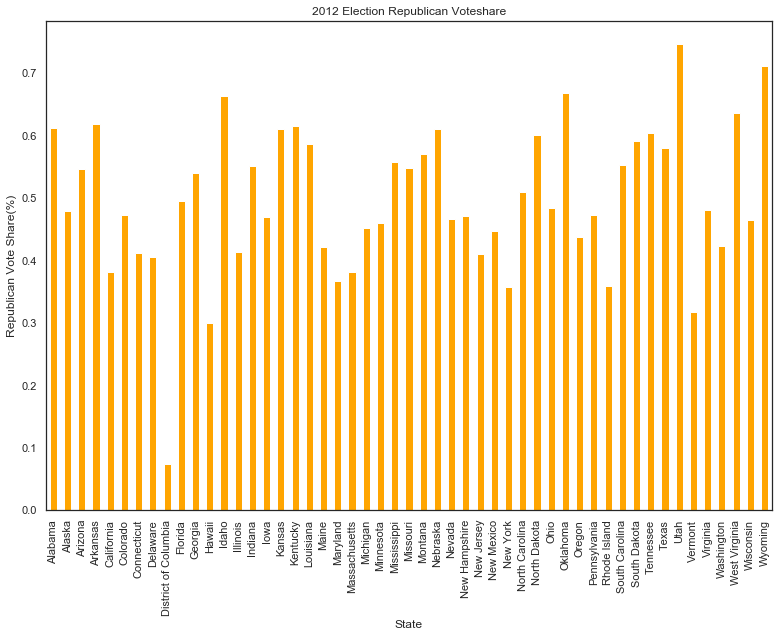

In [30]:
# Bar graph representing 2012 Republican voteshare by state in percetange 

plt.figure(figsize=(13,9))
df_state['Republicans 12 (Votes)'].plot(kind='bar', color='orange')
plt.ylabel('Republican Vote Share(%)')
plt.xlabel('State')
plt.title('2012 Election Republican Voteshare')
plt.show()

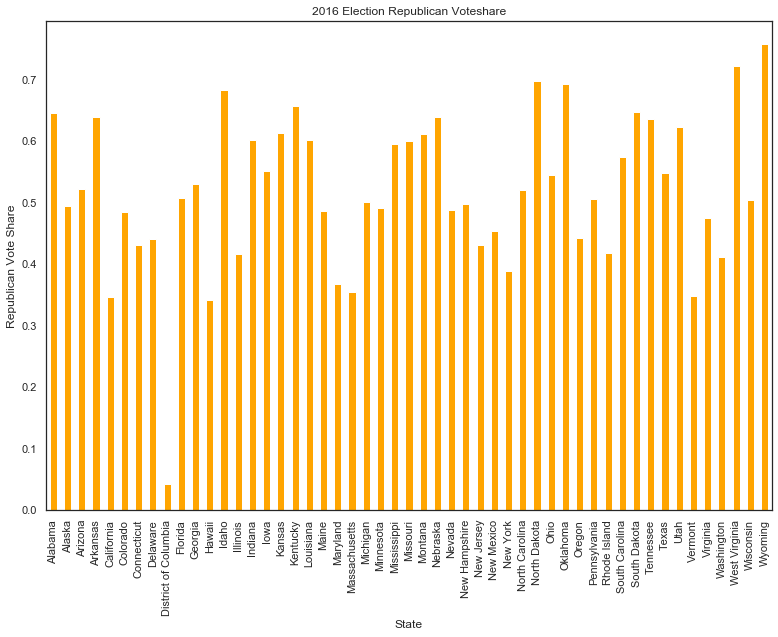

In [31]:
# Bar graph representing 2016 Republican voteshare by state in percetange 

plt.figure(figsize=(13,9))
df_state['votes16_trumpd'].plot(kind='bar', color='orange')
plt.ylabel('Republican Vote Share')
plt.xlabel('State')
plt.title('2016 Election Republican Voteshare')
plt.show()

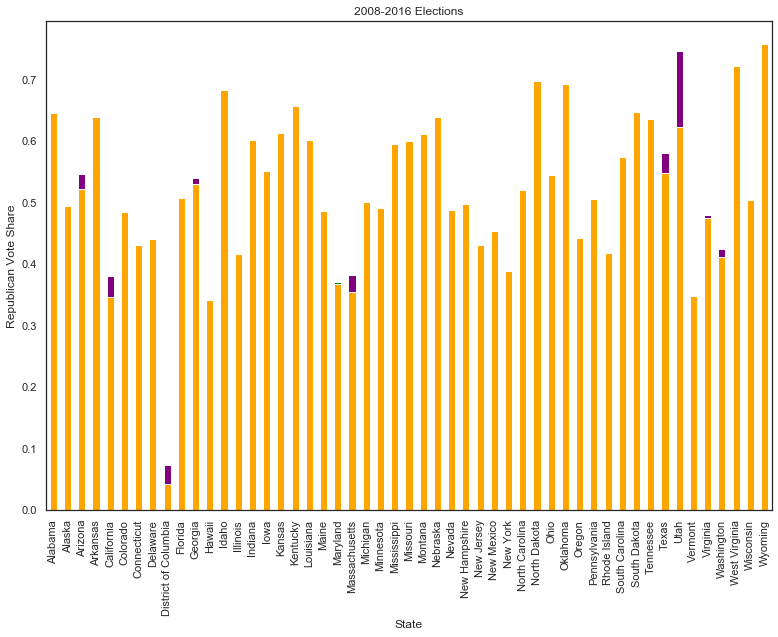

In [32]:
# Stacking the three previous graphs together to better visualize any difference between Republican vote between 2008-16

plt.figure(figsize=(13,9))
df_state['Republicans 08 (Votes)'].plot(kind='bar',color='green')
df_state['Republicans 12 (Votes)'].plot(kind='bar',color='purple')
df_state['votes16_trumpd'].plot(kind='bar', color='orange')
plt.ylabel('Republican Vote Share')
plt.xlabel('State')
plt.title('2008-2016 Elections')
plt.show()

`Green` is 2008 Republican Election Voteshare
`Purple` is 2012 Republican Election Voteshare
`Organge` is 2016 Republican Election Voteshare

Over three elections, the increase of Republican votes affects almost every state, excluding few.




# Look back at the non-aggregated county-level data. Conduct one or more statistical tests to see whether the mean Republican party vote share across all of the counties are different for the 3 elections (Which statistical test is appropriate here? Assume that the people who voted in each county are a representative sample of its population.) Describe why you’ve chosen your tests and interpret your results.

In [33]:
# Step one, find the mean Republican vote share for each election. 
county_mean = elect_data.groupby("County").mean()

# Group by county, to be able to conduct a One Way ANOVA test.

In [34]:
# ANOVA test will be used because we want to see if theres a difference in mean between groups, in this case, Repubican vote shares for each election. 
stats.f_oneway(county_mean["Republicans08_Voteshare"], county_mean["Republicans12_Voteshare"], 
               county_mean["votes16_trumpd"])

F_onewayResult(statistic=747.2833979931457, pvalue=5.876555038317422e-302)

We can conclude that the p-value is very small meaning that the mean Republican vote share for each election is statistically different. The sample taken, Voteshares, are different for each election. Let's further test this out with a two sample T-Test, would be appropriate here as we are comparing election years, two samples at a time.

In [35]:
# Two Sampled T-test comparing vote shares from three elections for the Republican Party 


print('2008 + 2012 T-Test')
a = stats.ttest_ind(county_mean["Republicans08_Voteshare"], county_mean["Republicans12_Voteshare"])
print(a)
print('\n')
print('2012 + 2016 T-Test')
b =stats.ttest_ind(county_mean["Republicans12_Voteshare"], county_mean["votes16_trumpd"])
print(b)
print('\n')
print('2008 + 2016 T-Test')
c = stats.ttest_ind(county_mean["Republicans08_Voteshare"], county_mean["votes16_trumpd"])
print(c)

2008 + 2012 T-Test
Ttest_indResult(statistic=-8.217313953737046, pvalue=2.5053684727642997e-16)


2012 + 2016 T-Test
Ttest_indResult(statistic=-27.33646375813423, pvalue=1.478662288013778e-155)


2008 + 2016 T-Test
Ttest_indResult(statistic=-27.336505724108818, pvalue=1.4771451073359755e-155)


The p-value for all each two sampled T tests are all very low (< 0.05). We can reject the NULL hypothesis and conclude that samples from each election are different and do not share a similar mean. 

While correlations for election results are true for each election, some actually a trend for multiple elections. However, replicating an electino with similar results would be almost impossible at a county level. This is because there are over 3000 counties that have the potential to swing left or right, depending on the political climate. However, there are some counties where this is not true, many won't see a change of political party in the near future or ever, which could be labeled as constants (which would actually improve the p-value). There could be over 500 counties that swing per election, which would change the mean at a county level. Ofcourse, all of this regarding politcal climates in the passed, now , and future.  